Saving annual_survey.csv to annual_survey (1).csv
THE TOP 5 ROWS OF DATASET


   year industry_code_ANZSIC               industry_name_ANZSIC rme_size_grp  \
0  2011                    A  Agriculture, Forestry and Fishing          a_0   
1  2011                    A  Agriculture, Forestry and Fishing          a_0   
2  2011                    A  Agriculture, Forestry and Fishing          a_0   
3  2011                    A  Agriculture, Forestry and Fishing          a_0   
4  2011                    A  Agriculture, Forestry and Fishing          a_0   

                                          variable  value               unit  \
0                                    Activity unit  46134              COUNT   
1                           Rolling mean employees      0              COUNT   
2                          Salaries and wages paid    279  DOLLARS(millions)   
3  Sales, government funding, grants and subsidies   8187  DOLLARS(millions)   
4                                     Tot

/tmp/ipython-input-5-3275251732.py:46: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


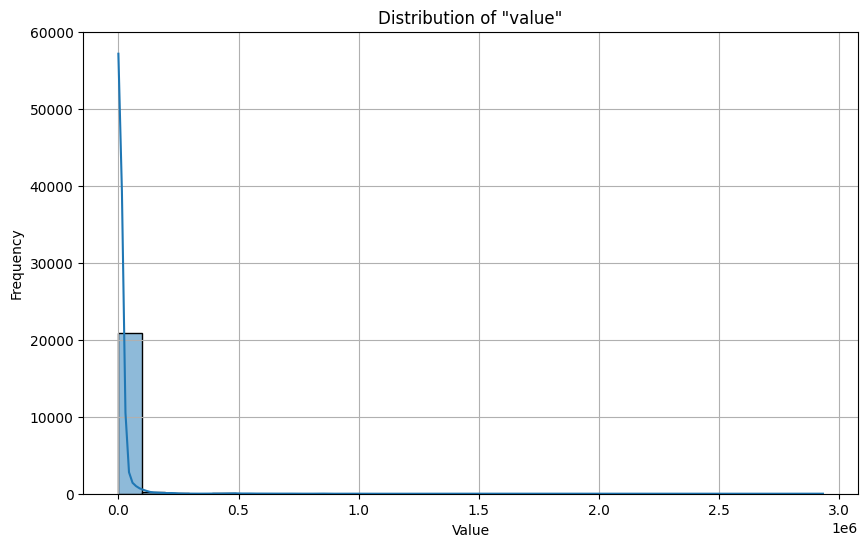

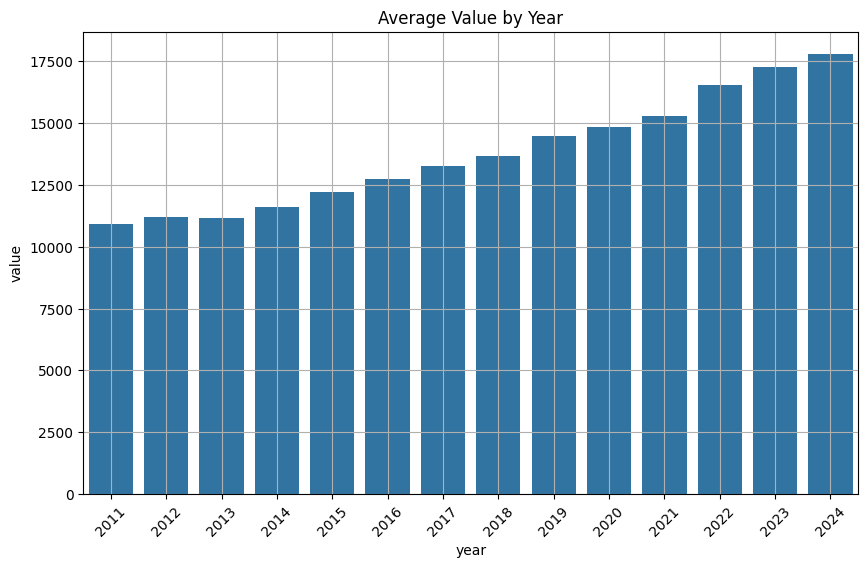

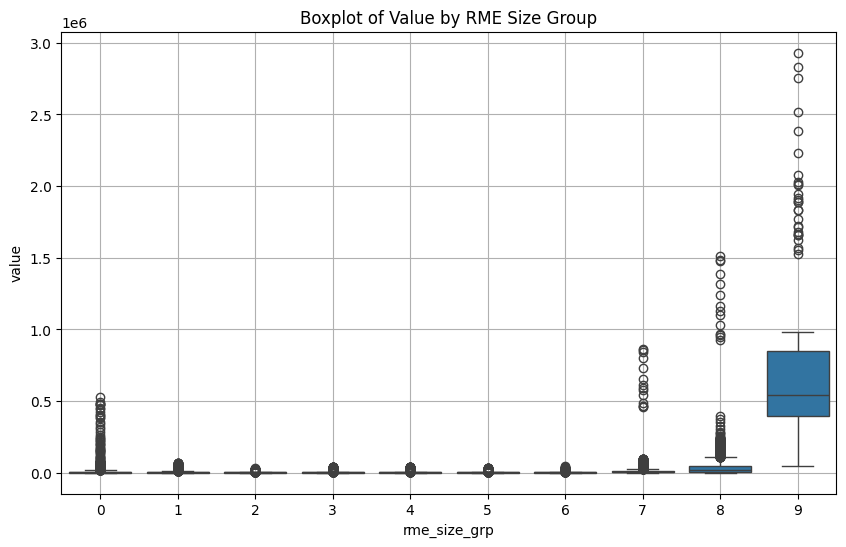

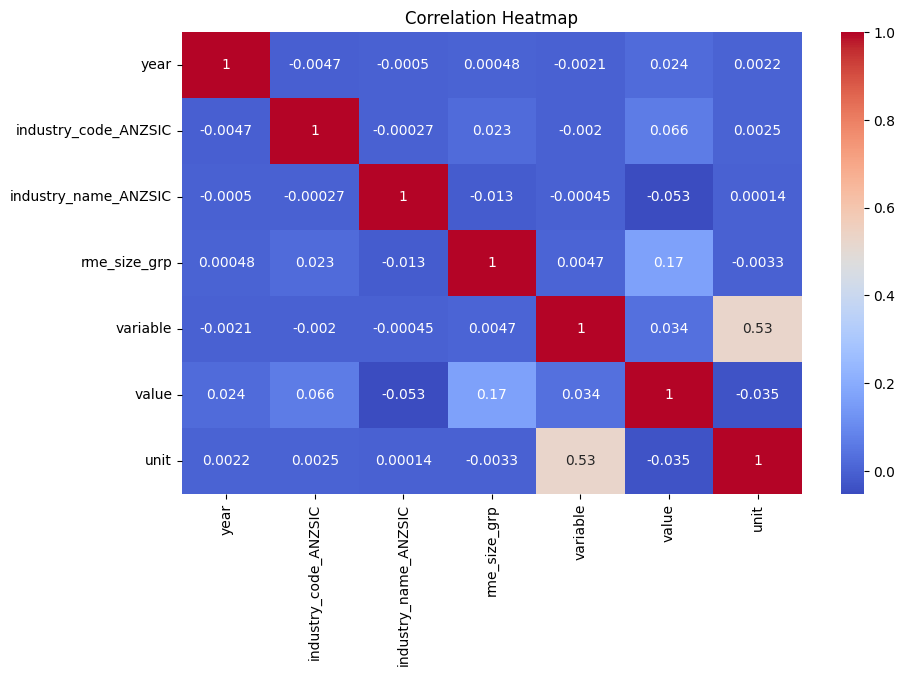


✅ Preprocessing and visualization complete.


In [5]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix, classification_report, log_loss
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# For Google Colab file upload
from google.colab import files
uploaded = files.upload()

# Read CSV file (update the filename if different)
df = pd.read_csv("annual_survey.csv")

# ----------------------
# Basic Exploration
# ----------------------
print("THE TOP 5 ROWS OF DATASET\n\n")
print(df.head())

print("\n\nINFORMATION OF DATASET\n\n")
print(df.info())

print("\n\nDESCRIPTION OF DATASET\n\n")
print(df.describe())

# ----------------------
# Data Cleaning
# ----------------------
# Drop mostly empty or irrelevant columns
df = df.drop(columns=[col for col in df.columns if "Unnamed" in col])
# Convert 'value' column to numeric
df['value'] = pd.to_numeric(df['value'], errors='coerce')
# Drop rows with missing 'value'
df = df.dropna(subset=['value'])
# Fill missing values in categorical columns with mode (if needed)
for col in df.select_dtypes(include='object').columns:
    df[col].fillna(df[col].mode()[0], inplace=True)
# Encode categorical variables
label_encoders = {}
categorical_cols = ['industry_code_ANZSIC', 'industry_name_ANZSIC', 'rme_size_grp', 'variable', 'unit']
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le
# Impute remaining numeric missing values with mean
imputer = SimpleImputer(strategy='mean')
df['value'] = imputer.fit_transform(df[['value']])
# Plot 1: Distribution of 'value'
plt.figure(figsize=(10, 6))
sns.histplot(df['value'], kde=True, bins=30)
plt.title('Distribution of "value"')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()
# Plot 2: Average Value by Year
plt.figure(figsize=(10, 6))
sns.barplot(x='year', y='value', data=df.groupby('year', as_index=False)['value'].mean())
plt.title('Average Value by Year')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()
# Plot 3: Boxplot of Value by RME Size Group
plt.figure(figsize=(10, 6))
sns.boxplot(x='rme_size_grp', y='value', data=df)
plt.title('Boxplot of Value by RME Size Group')
plt.grid(True)
plt.show()
# Plot 4: Heatmap of correlation
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()
print("\n✅ Preprocessing and visualization complete.")
